## Imports

#### This project random numbers are going to be part of the algorithms that are going to be used. And if we don't have the same starting point, or if we don't have the same seed for these random numbers, then we might get very different results. So in order for this module and for this project to be reproducible and to avoid confusion,  we should both set the same seed in the very beginning of this notebook.

In [50]:
import os
import random
import tensorflow as tf
import itertools

random.seed(888)
tf.random.set_seed(404)


import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout

from time import strftime

from sklearn.metrics import confusion_matrix

from IPython.display import display
from keras.preprocessing.image import array_to_img
%matplotlib inline

## Get the Data

In [4]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

In [5]:
type(X_train)

numpy.ndarray

# Constants

In [6]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat','Deer', 'Dog','Frog','Horse', 'Ship','Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
VALIDATION_SIZE= 10000
SMALL_TRAIN_SIZE = 1000

## EXPLORE DATA

In [7]:
X_train.shape

(50000, 32, 32, 3)

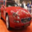

In [8]:
pic = array_to_img(X_train[5])
display(pic)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[7][0]

7

In [11]:
LABEL_NAMES[y_train[7][0]]

'Horse'

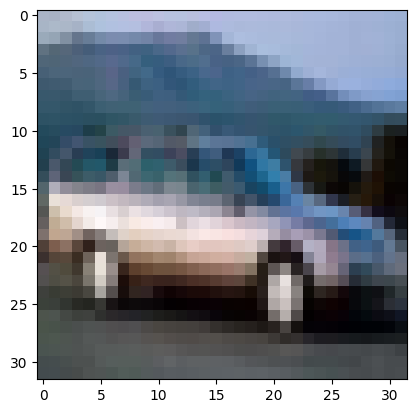

In [12]:
plt.imshow(X_train [4])
plt.show()

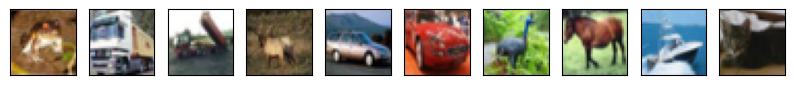

In [13]:
plt.figure(figsize=(10,6))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

In [14]:
X_test.shape

(10000, 32, 32, 3)

## Preproocessing Data

In [15]:
type(X_train[7][0][0][0])

numpy.uint8

In [16]:
X_train, X_test = X_train/ 255.0, X_test/255.0

In [17]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
X_train = X_train.reshape(X_train.shape[0],TOTAL_INPUTS)

In [20]:
X_train.shape

(50000, 3072)

In [21]:
X_test = X_test.reshape(X_test.shape[0],TOTAL_INPUTS)

In [22]:
X_test.shape

(10000, 3072)

In [23]:
X_val = X_train[:VALIDATION_SIZE]
y_val = y_train[:VALIDATION_SIZE]

In [24]:
X_val.shape

(10000, 3072)

In [25]:
y_val.shape

(10000, 1)

In [26]:
X_train_all = X_train[VALIDATION_SIZE:]
y_train_all = y_train[VALIDATION_SIZE:]

In [27]:
X_train_all.shape

(40000, 3072)

## Create a small dataset

In [28]:
X_train_xs = X_train_all[:SMALL_TRAIN_SIZE]
y_train_xs = y_train_all[:SMALL_TRAIN_SIZE]

## Define the NN using Keras

In [29]:
model_1 = Sequential([
    Dense(units = 128, input_dim = TOTAL_INPUTS, activation = 'relu'),
    Dense(units=64, activation= 'relu'),
    Dense(units=16, activation='relu'),
    Dense(units=10, activation='softmax')
])

## Compile our Model
model_1.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics= ['accuracy'])

In [30]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [31]:
type(model_1)

keras.src.engine.sequential.Sequential

In [32]:
type(model_2)

keras.src.engine.sequential.Sequential

In [33]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 402810 (1.54 MB)
Trainable params: 402810 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m2_hidden3 (Dense)          (None, 15)                975       
                                                                 
 m2_output (Dense)           (None, 10)                160       
                                                                 
Total params: 402735 (1.54 MB)
Trainable params: 402735 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit the model

In [35]:
samples_per_batch = 1000

In [36]:
%%time
nr_epochs = 150
model_1.fit(X_train_xs, y_train_xs, batch_size= samples_per_batch, epochs=nr_epochs,
             verbose = 0, validation_data= (X_val, y_val))

CPU times: user 1min 6s, sys: 5.33 s, total: 1min 12s
Wall time: 1min 15s


In [37]:
%%time
nr_epochs = 150
model_2.fit(X_train_xs, y_train_xs, batch_size= samples_per_batch, epochs=nr_epochs,
             verbose = 0, validation_data= (X_val, y_val))

CPU times: user 1min 11s, sys: 4.36 s, total: 1min 16s
Wall time: 1min 25s


In [38]:
%%time
nr_epochs = 100
model_1.fit(X_train_all, y_train_all, batch_size= samples_per_batch, epochs=nr_epochs,
             verbose = 0, validation_data= (X_val, y_val))

CPU times: user 5min 48s, sys: 10.9 s, total: 5min 59s
Wall time: 4min 23s


In [39]:
%%time
nr_epochs = 100
model_2.fit(X_train_all, y_train_all, batch_size= samples_per_batch, epochs=nr_epochs,
             verbose = 0, validation_data= (X_val, y_val))

CPU times: user 8min 17s, sys: 9.94 s, total: 8min 27s
Wall time: 6min 23s


## Predicated on Indivudual Images

In [46]:
X_val.shape

(10000, 3072)

In [40]:
X_val[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [42]:
X_val[0].shape

(3072,)

In [45]:
test = np.expand_dims(X_val[0], axis = 0)
test.shape

(1, 3072)

In [72]:
for number in range(10):
  test_img = np.expand_dims (X_val[number], axis = 0)
  predicted_val= model_2.predict(test_img)[0]
  predicted_value = np.argmax(predicted_val, axis= 0)
  print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_value}')

1/1 [==============================] - 0s 90ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 89ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 84ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 49ms/step
Actual value: 4 vs. predicted: 4
1/1 [==============================] - 0s 72ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 107ms/step
Actual value: 1 vs. predicted: 1
1/1 [==============================] - 0s 80ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 81ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 75ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 48ms/step
Actual value: 3 vs. predicted: 9


## Evaluation

In [62]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 2s 6ms/step - loss: 1.4424 - accuracy: 0.4891
Test loss is 1.44 and test accuracy is 48.9%


## Confusion Matrix

In [65]:
X_test, y_test

(array([[0.61960784, 0.43921569, 0.19215686, ..., 0.08235294, 0.2627451 ,
         0.43137255],
        [0.92156863, 0.92156863, 0.92156863, ..., 0.72941176, 0.78431373,
         0.78039216],
        [0.61960784, 0.74509804, 0.87058824, ..., 0.02745098, 0.03137255,
         0.02745098],
        ...,
        [0.07843137, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843137,
         0.18431373],
        [0.09803922, 0.15686275, 0.04705882, ..., 0.36078431, 0.47058824,
         0.31372549],
        [0.28627451, 0.30588235, 0.29411765, ..., 0.10588235, 0.10196078,
         0.10196078]]),
 array([[3],
        [8],
        [8],
        ...,
        [5],
        [1],
        [7]], dtype=uint8))

In [69]:
pred = model_2.predict(X_test)
predictions = np.argmax(pred, axis = 1)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

313/313 [==============================] - 1s 3ms/step


In [70]:
predictions

array([3, 9, 0, ..., 5, 2, 7])

In [73]:
conf_matrix.shape

(10, 10)

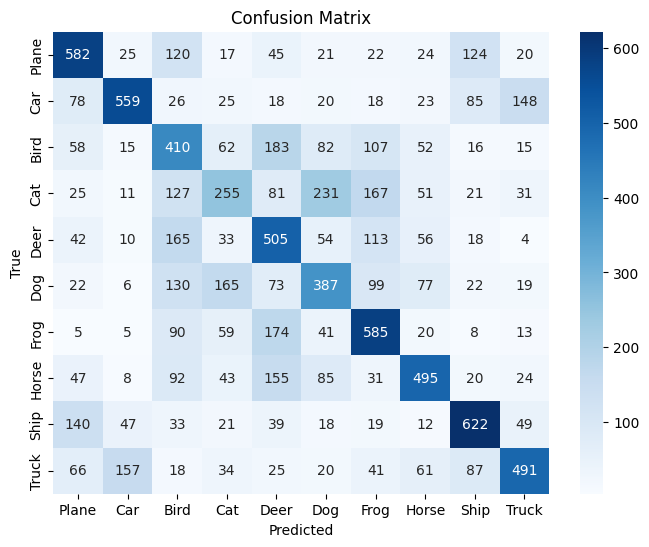

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already calculated the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=LABEL_NAMES, yticklabels=LABEL_NAMES)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the heatmap as an image file (e.g., PNG)
plt.savefig('heatmap.png', format='png')

# Show the plot
plt.show()


In [75]:
from sklearn.metrics import accuracy_score, precision_score, f1_score


# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1)


Accuracy: 0.4891
Precision: 0.4964109181432007
F1-Score: 0.48900720653077634
